# Breast Cancer dataset SDV Example 

In [33]:
from sdv.tabular import TVAE
from sdv.tabular import GaussianCopula
from sdv.tabular import CTGAN
from sdv.tabular import CopulaGAN
import pandas as pd
from sdv.evaluation import evaluate
from table_evaluator import load_data, TableEvaluator
import sys

In [34]:
def readFile(inputFile):
    data = pd.read_csv(inputFile)
    data = data.dropna(how='all', axis=1)
    return data

In [35]:
def modelStep(data, model, primary_key_value):
    if model == "TVAE":
        model = TVAE(primary_key = primary_key_value)
    elif model == "GaussianCopula":
        model = GaussianCopula(primary_key = primary_key_value)
    elif model == "CTGAN":
        model = CTGAN(primary_key = primary_key_value)
    elif model == "CopulaGAN":
        model = CopulaGAN(primary_key = primary_key_value)
    else:
        print("Incorrect model name")
        sys.exit()

    model.fit(data)
    new_data = model.sample(num_rows=data.shape[0])
    return new_data

In [36]:
def evaluationStep(new_data, data):
    print(evaluate(new_data,data, aggregate = False))
    table_evaluator = TableEvaluator(data, new_data)
    table_evaluator.visual_evaluation()    

In [37]:
def main(data, model,primary_key_value = None):
    data = readFile(data)
    new_data = modelStep(data, model, primary_key_value)
    evaluationStep(new_data, data)

         metric                                     name  raw_score  \
0  KSComplement  Inverted Kolmogorov-Smirnov D statistic   0.861273   
1        CSTest                              Chi-Squared   0.916048   

   normalized_score  min_value  max_value      goal error  
0          0.861273        0.0        1.0  MAXIMIZE  None  
1          0.916048        0.0        1.0  MAXIMIZE  None  


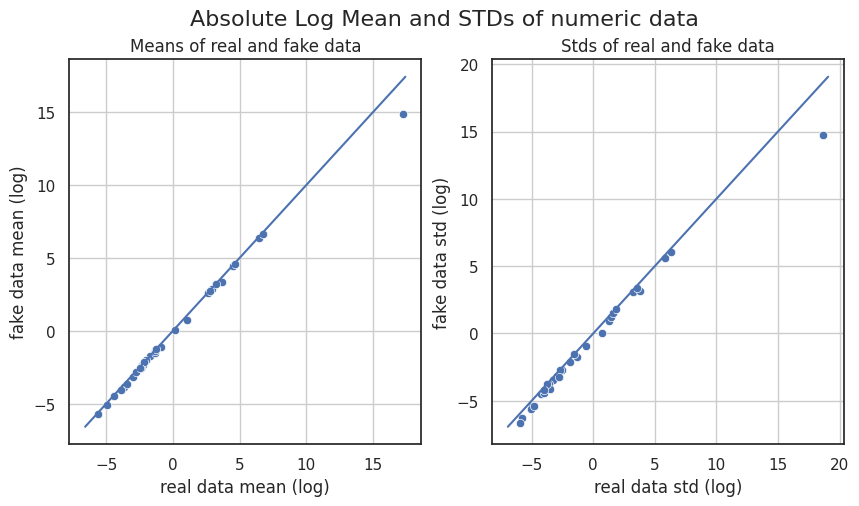

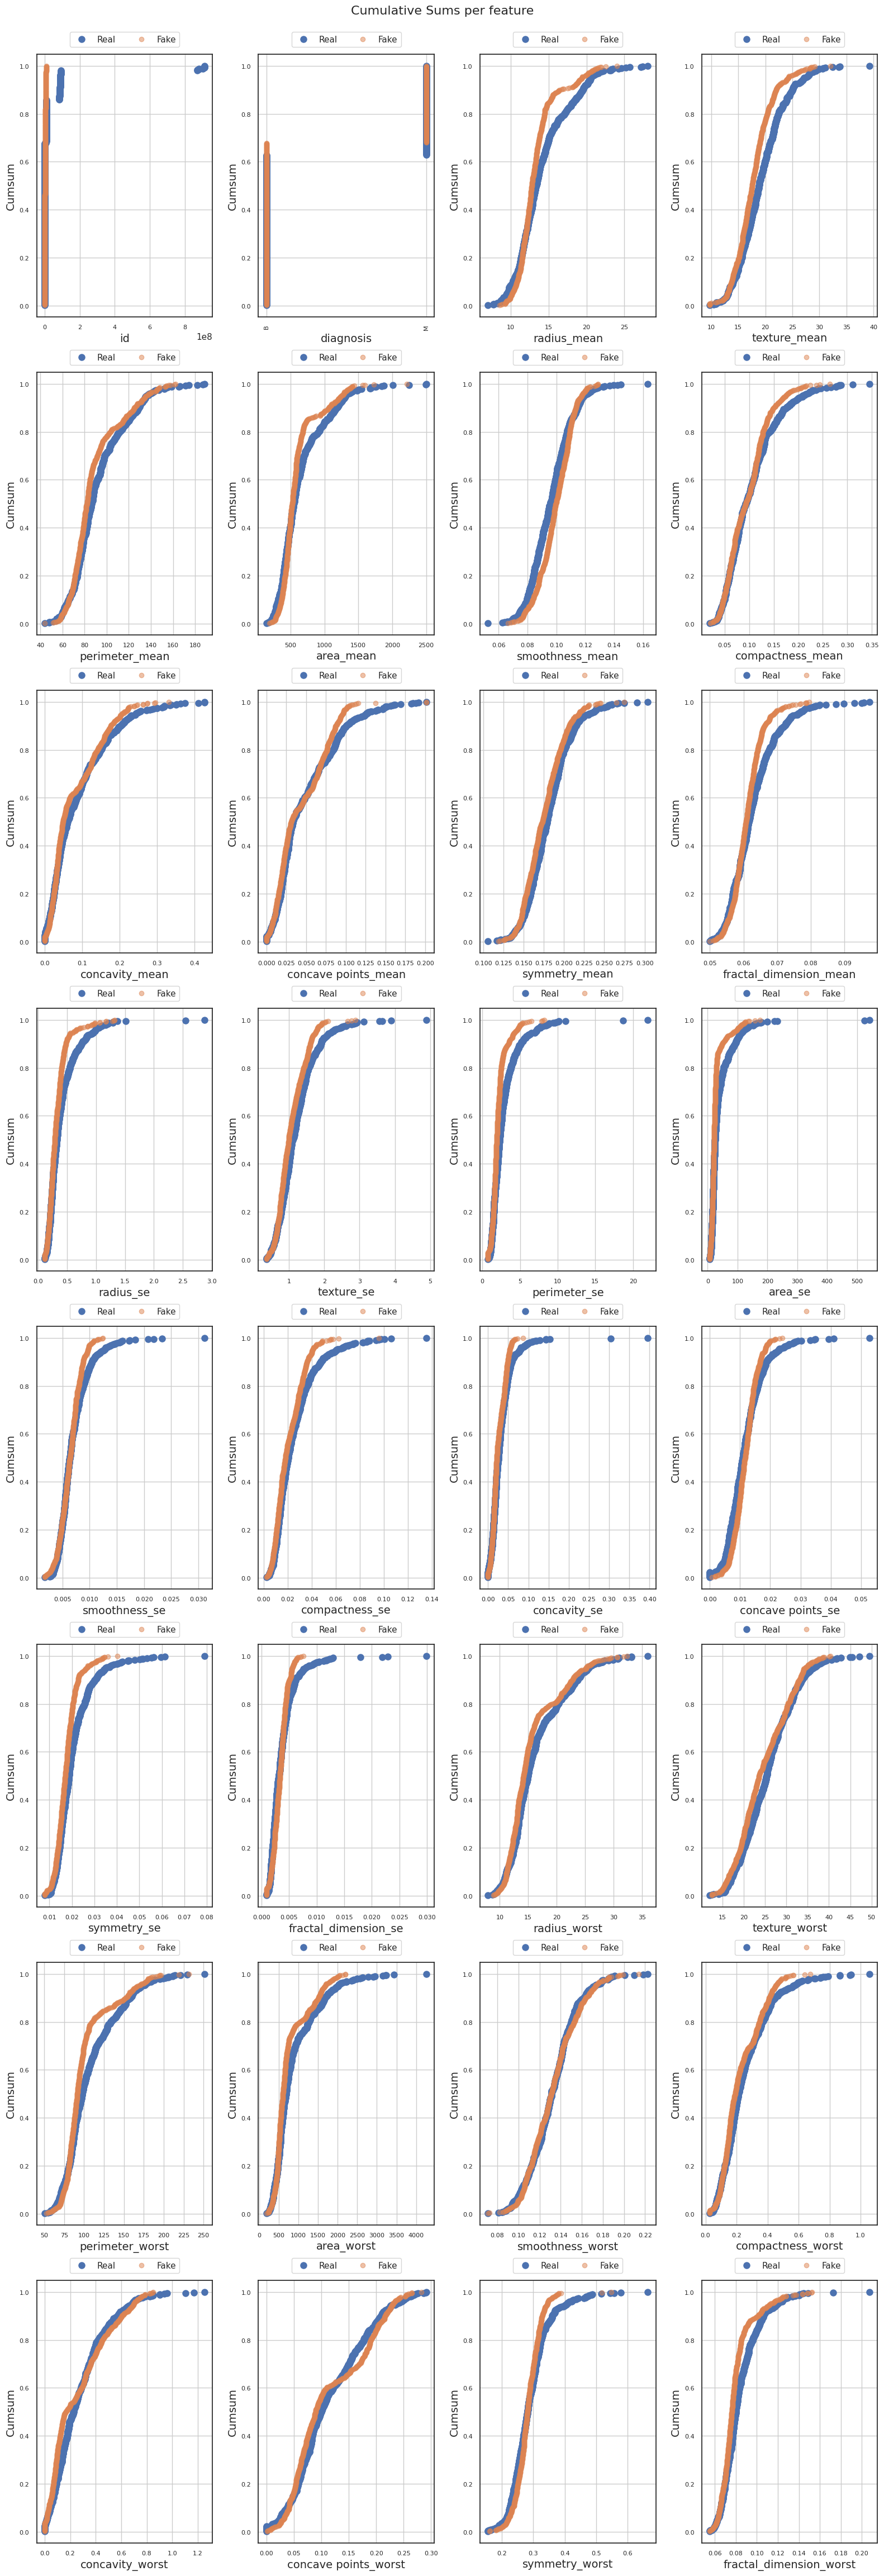

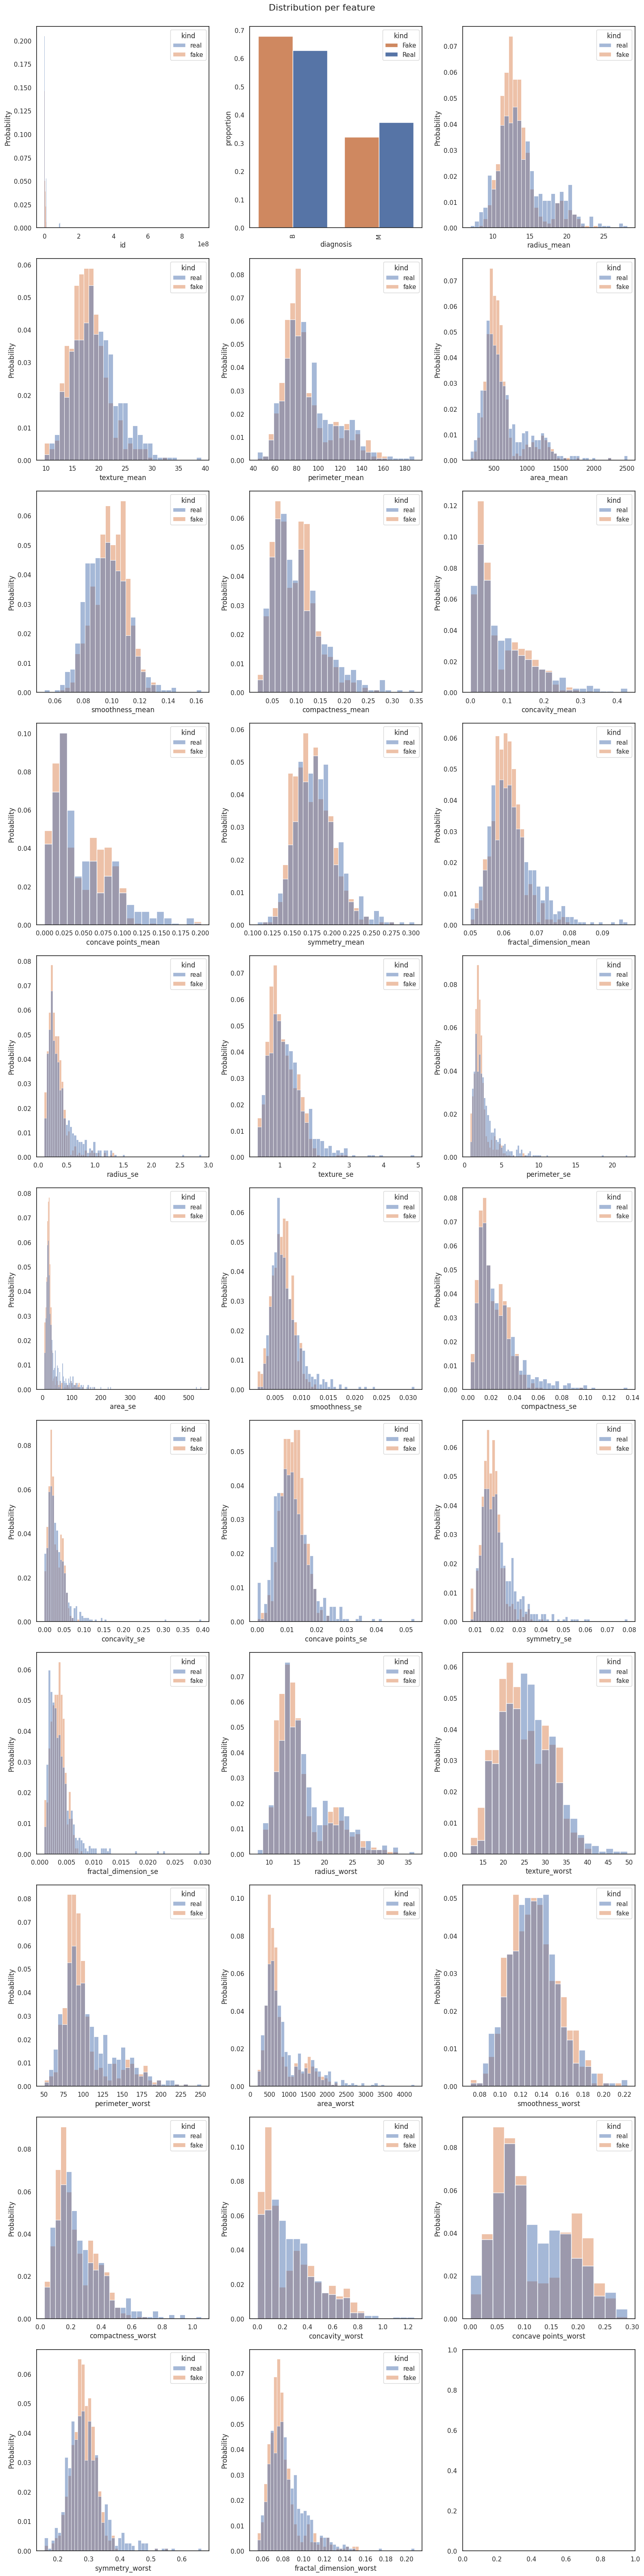

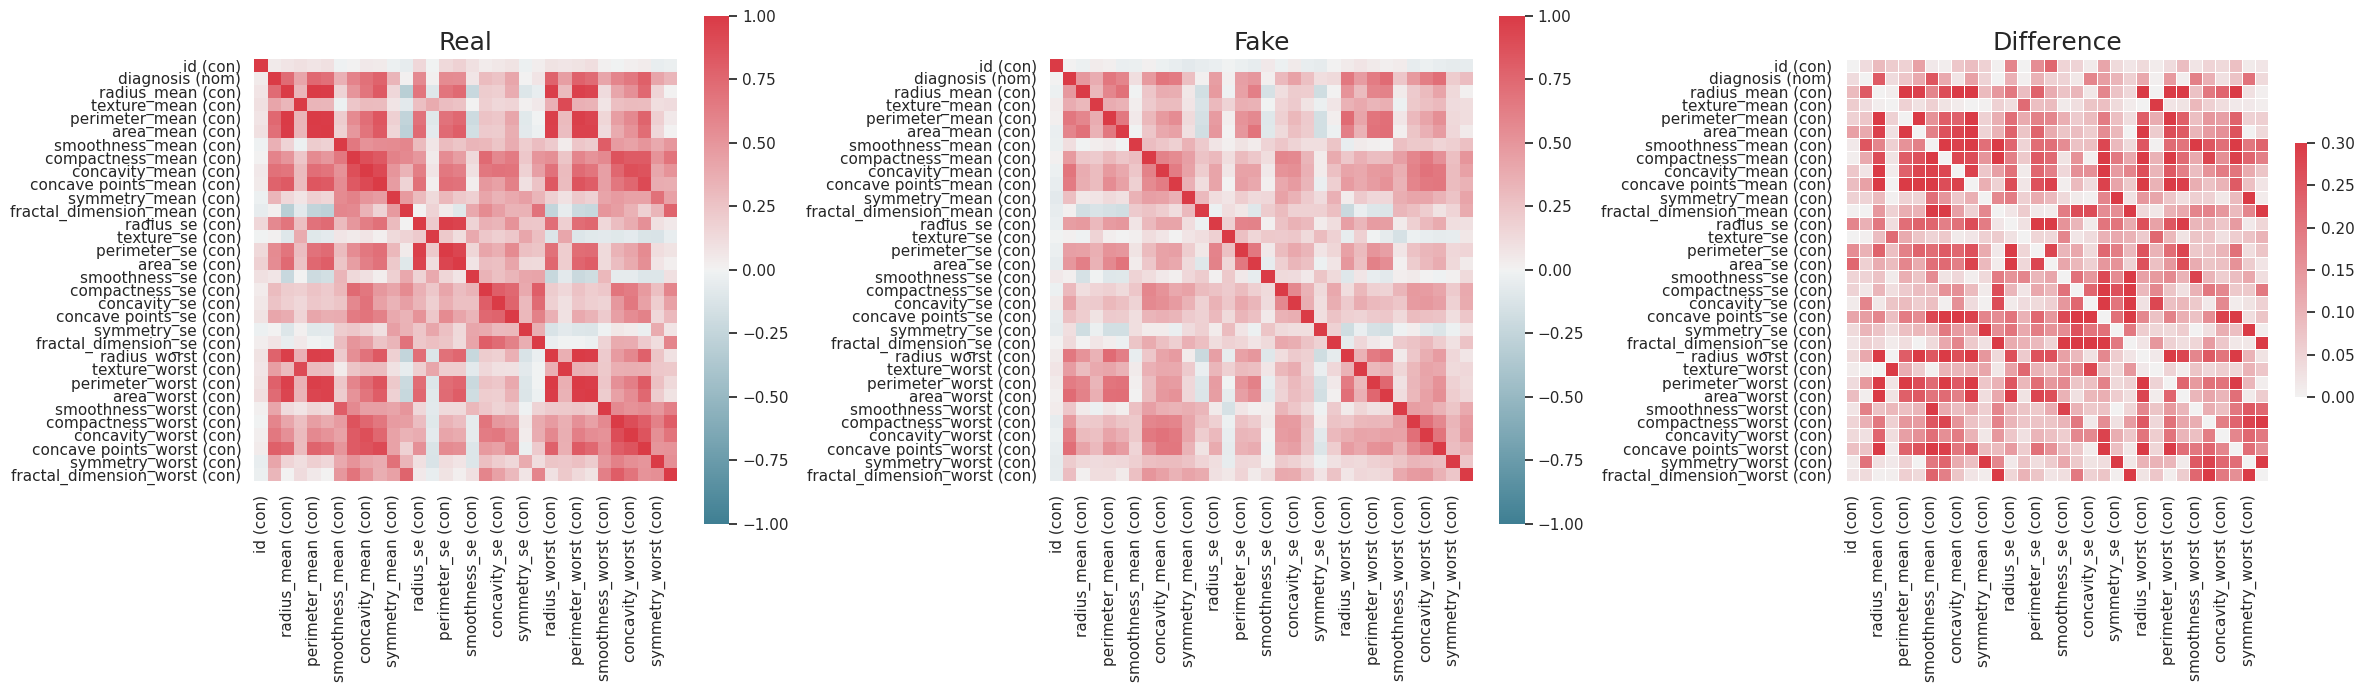

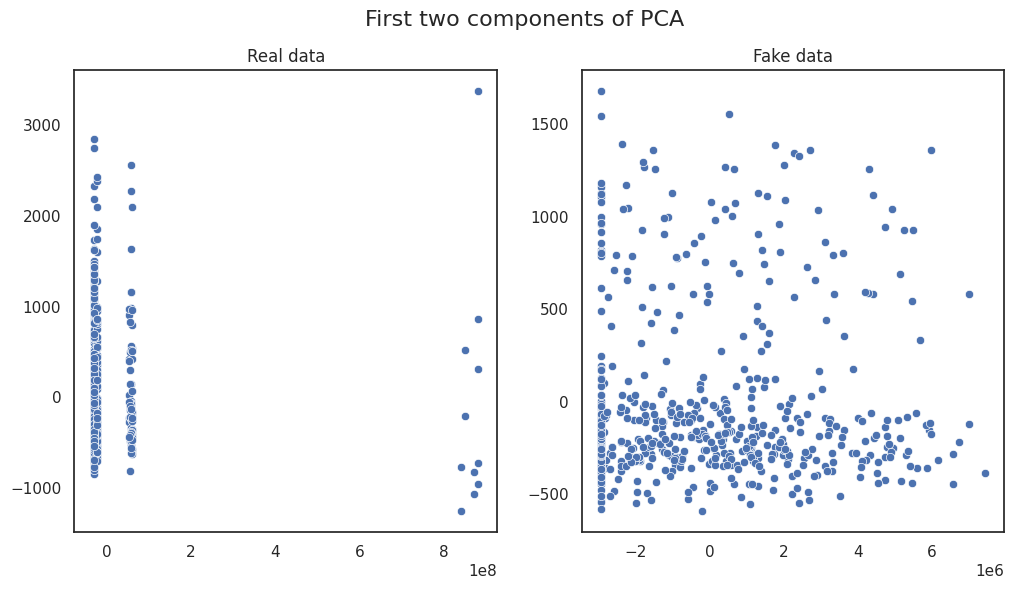

In [38]:
main('../data/archive/data.csv', "TVAE")